In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('airline_tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [4]:
df['text'][3]

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse'

<Axes: xlabel='airline_sentiment', ylabel='count'>

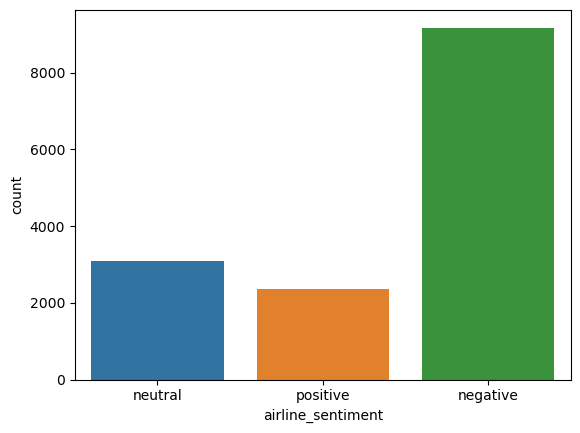

In [5]:
sns.countplot(data = df,x = 'airline_sentiment')

In [6]:
df['negativereason'].value_counts()

negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64

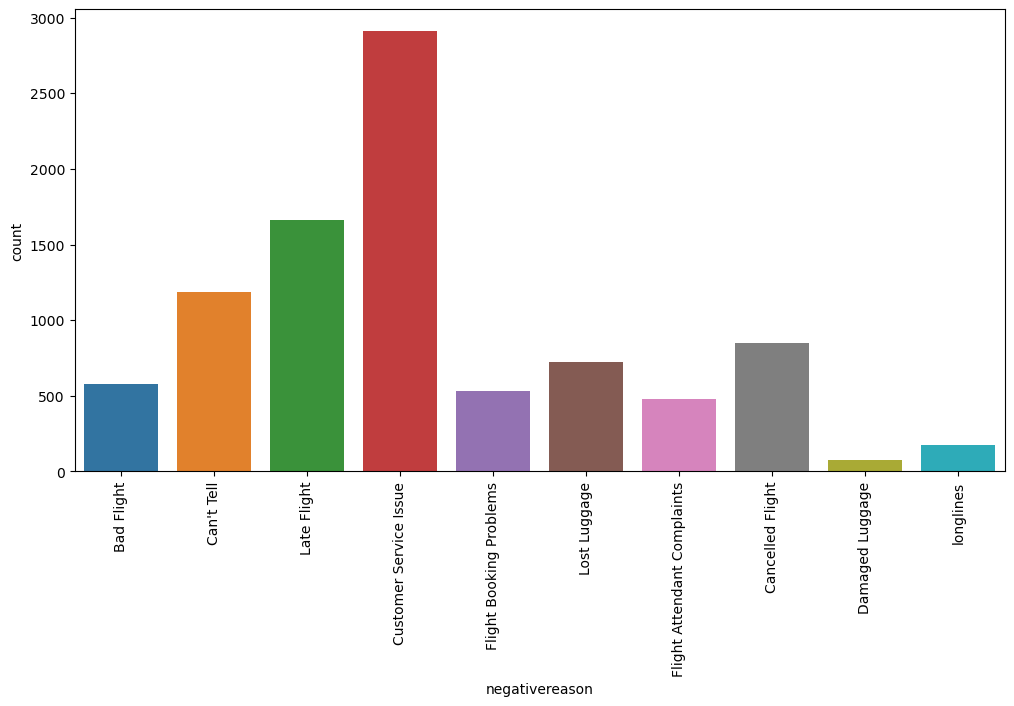

In [7]:
plt.figure(figsize = (12,6))
sns.countplot(data = df,x = 'negativereason')
plt.xticks(rotation = 90)
plt.show()

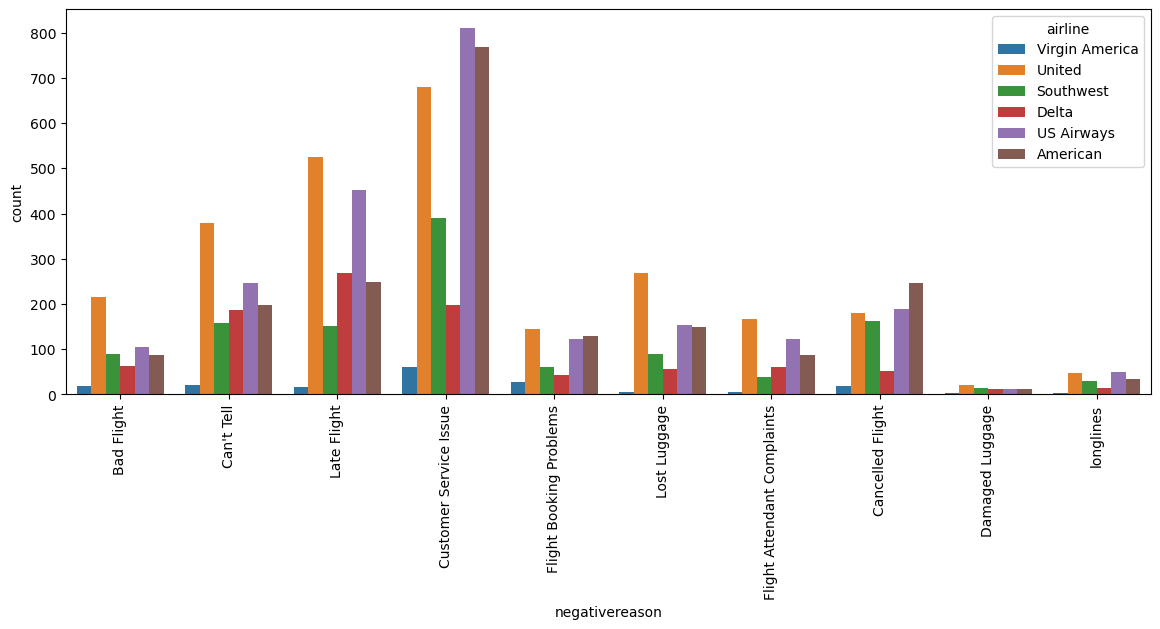

In [8]:
plt.figure(figsize = (14,5))
sns.countplot(data = df,x = 'negativereason',hue = 'airline')
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='airline', ylabel='count'>

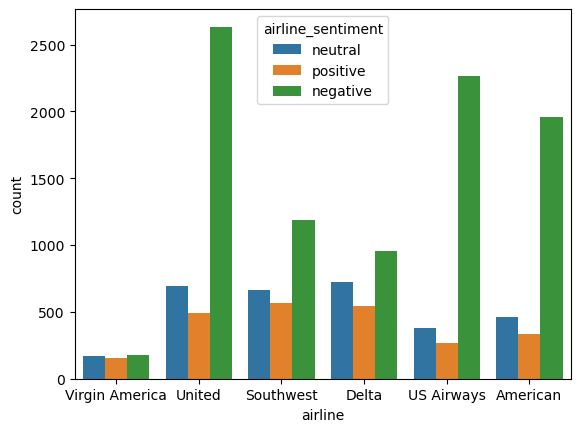

In [9]:
sns.countplot(data = df,x = 'airline',hue = 'airline_sentiment')

In [10]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

### Features and Label

In [11]:
data = df[['airline_sentiment','text']]

In [16]:
y= df['airline_sentiment']
X = df['text'].values
X

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

#### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df.shape

(14640, 15)

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 101)

## Vectorization

In [20]:
## if we want to add some extra word to the common words in english, we will use

# add.ENGLISH_STOP_WORDS.union(['asdf'])

In [21]:
from sklearn.feature_extraction .text import TfidfVectorizer

In [22]:
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [24]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [25]:
## This is where we come to ML model

In [26]:
X_train_tfidf.todense().shape

(11712, 12971)

## Model Comparision

In [30]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [34]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=100)
log.fit(X_train_tfidf,y_train)


C:\Users\Deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train_tfidf,y_train)

RandomForestClassifier()

### Performance Evaluation

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [38]:
def report(mod):
    print('model is: ',mod)
    y_pred = mod.predict(X_test_tfidf)
    print(classification_report(y_pred,y_test))
    cm = confusion_matrix(y_pred,y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)
    disp.plot()

model is:  MultinomialNB()
              precision    recall  f1-score   support

    negative       0.99      0.66      0.79      2730
     neutral       0.15      0.79      0.26       123
    positive       0.14      0.89      0.24        75

    accuracy                           0.67      2928
   macro avg       0.43      0.78      0.43      2928
weighted avg       0.94      0.67      0.76      2928



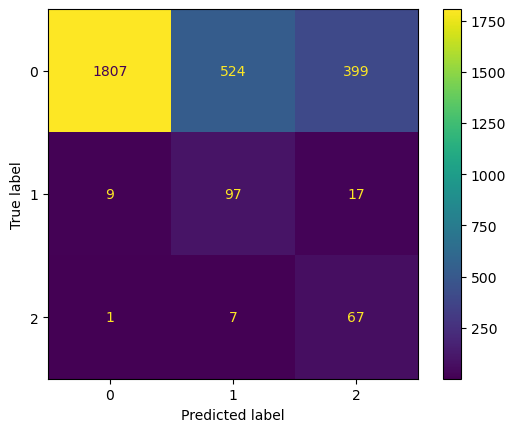

In [39]:
report(nb)

model is:  LogisticRegression()
              precision    recall  f1-score   support

    negative       0.93      0.80      0.86      2123
     neutral       0.47      0.63      0.54       464
    positive       0.58      0.82      0.68       341

    accuracy                           0.77      2928
   macro avg       0.66      0.75      0.69      2928
weighted avg       0.82      0.77      0.79      2928



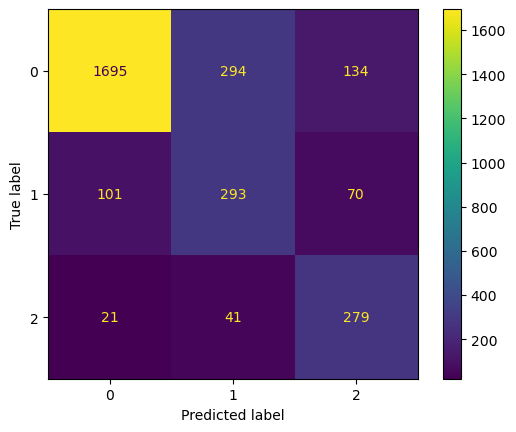

In [40]:
report(log)

model is:  LinearSVC()
              precision    recall  f1-score   support

    negative       0.89      0.82      0.86      1970
     neutral       0.52      0.59      0.55       554
    positive       0.64      0.76      0.69       404

    accuracy                           0.77      2928
   macro avg       0.68      0.73      0.70      2928
weighted avg       0.79      0.77      0.78      2928



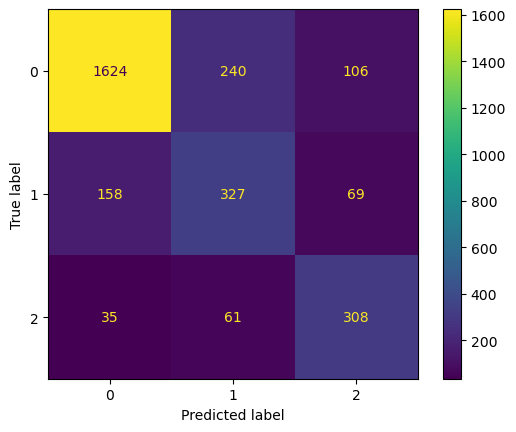

In [41]:
report(svc)

model is:  RandomForestClassifier()
              precision    recall  f1-score   support

    negative       0.94      0.76      0.84      2234
     neutral       0.34      0.59      0.43       358
    positive       0.52      0.74      0.61       336

    accuracy                           0.74      2928
   macro avg       0.60      0.70      0.63      2928
weighted avg       0.81      0.74      0.76      2928



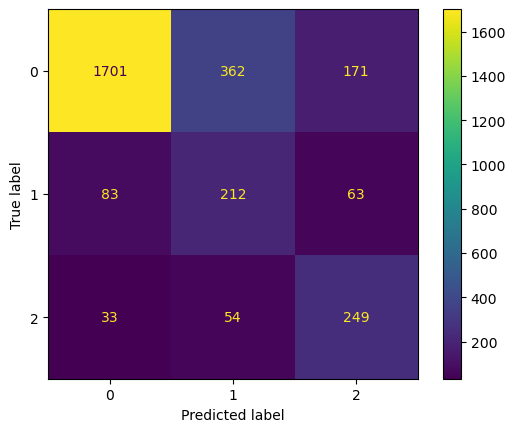

In [42]:
report(rfc)

### Pipeline

In [43]:
from sklearn.pipeline import Pipeline

In [32]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])
pipe.fit(df['text'],df['airline_sentiment'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [33]:
new_tweet = ['good flight']
pipe.predict(new_tweet)

array(['positive'], dtype=object)

In [34]:
new_tweet = ['bad flight']
pipe.predict(new_tweet)

array(['negative'], dtype=object)

In [35]:
new_tweet = ['bad flight','good flight','I would love to travel again with your airline however I will never suggest your airline to anyone']
pipe.predict(new_tweet)

array(['negative', 'positive', 'negative'], dtype=object)

In [36]:
new_tweet = ['bad flight','good flight','Airline experience was great but airport was horrible']
pipe.predict(new_tweet)

array(['negative', 'positive', 'positive'], dtype=object)

In [37]:
new_tweet = ['bad flight','good flight','Airline was not one of worst I have seen']
pipe.predict(new_tweet)

array(['negative', 'positive', 'negative'], dtype=object)